#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error


#### Load and Preprocess Data

In [2]:
# Load the dataset
data = pd.read_csv(r'C:\Users\Admin\Desktop\sales_data.csv')
data.head(20)

,Date,Product,Region,Sales
0,2011-01-01,Laptop,Central,213.28
1,2011-01-02,Smartwatch,South,198.31
2,2011-01-03,Tablet,South,218.87
3,2011-01-04,Smartphone,East,241.66
4,2011-01-05,Smartphone,South,198.64
5,2011-01-06,Smartwatch,West,199.55
6,2011-01-07,Accessory,Central,245.79
7,2011-01-08,Laptop,East,226.40
8,2011-01-09,Smartphone,West,196.37
9,2011-01-10,Smartphone,West,222.57


In [3]:
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])


In [4]:
# Set 'Date' as the index
data.set_index('Date', inplace=True)


In [5]:
# Check for missing values
print(data.isnull().sum())


Product    0
Region     0
Sales      0
dtype: int64


#### Exploratory Data Analysis (EDA)
##### Plotting the historical sales data can help understand trends, seasonality, and cycles.


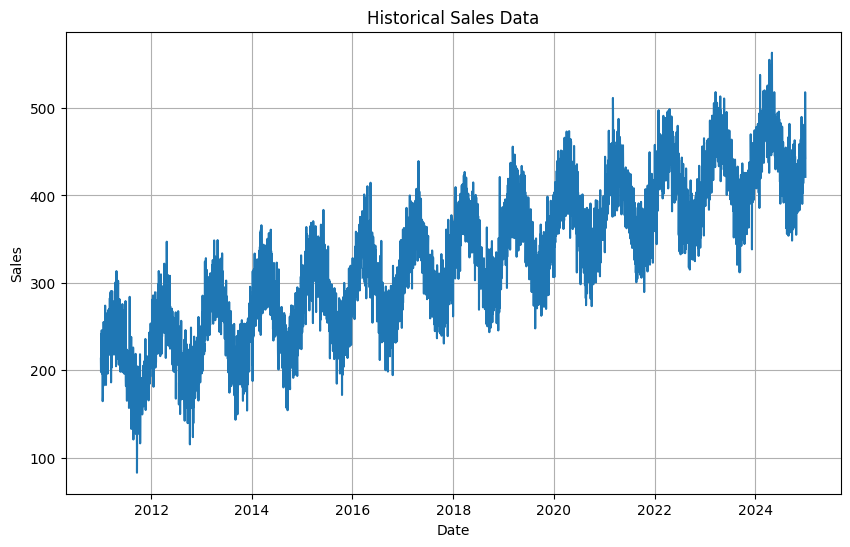

In [7]:
# Visualizing the historical sales data
plt.figure(figsize=(10, 6))
plt.plot(data['Sales'])
plt.title('Historical Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


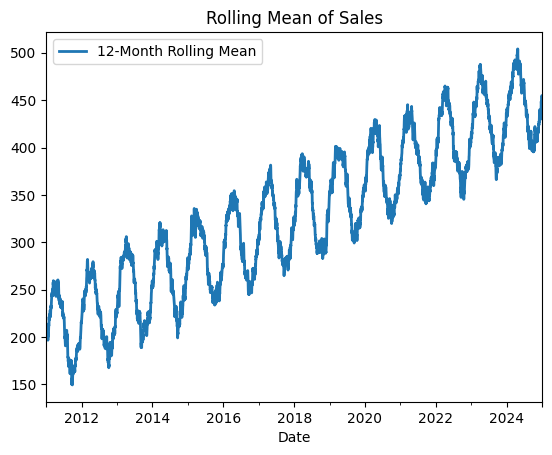

In [8]:
# Check for seasonality and trend
data['Sales'].rolling(window=12).mean().plot(label='12-Month Rolling Mean', linewidth=2)
plt.legend(loc='best')
plt.title('Rolling Mean of Sales')
plt.show()


#### Model Selection

##### Model 1: ARIMA/SARIMA
###### ARIMA (Auto-Regressive Integrated Moving Average) is useful for univariate time series forecasting.


In [9]:
# Fit SARIMA model
sarima_model = SARIMAX(data['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)

C:\Users\Admin\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [10]:
# Summary of the model
print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                 5114
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -23925.403
Date:                            Wed, 26 Nov 2025   AIC                          47860.806
Time:                                    03:11:59   BIC                          47893.492
Sample:                                01-01-2011   HQIC                         47872.250
                                     - 12-31-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0460      0.016     -2.925      0.003      -0.077      -0.015
ma.L1         -0.8694      0.008   

In [11]:
# Forecast the next 12 months
forecast = sarima_result.get_forecast(steps=12)
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=12, freq='M')
forecast_values = forecast.predicted_mean

C:\Users\Admin\AppData\Local\Temp\ipykernel_12100\2938681548.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=12, freq='M')


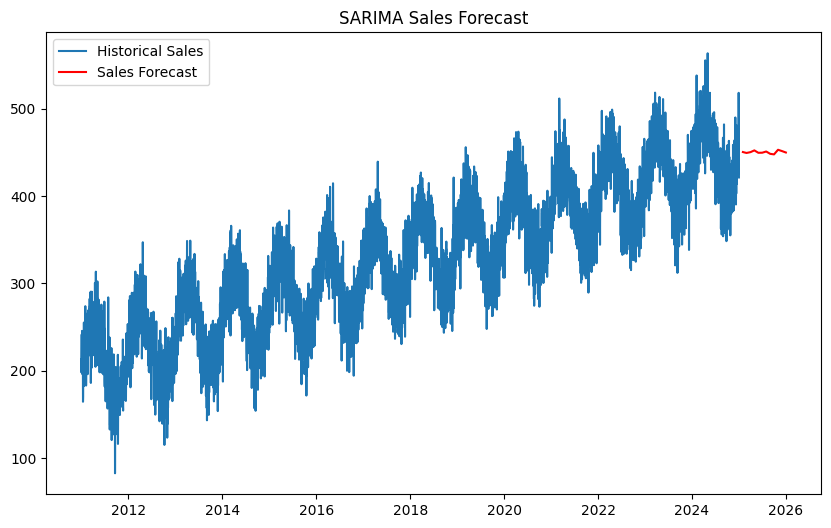

In [12]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Sales'], label='Historical Sales')
plt.plot(forecast_index, forecast_values, label='Sales Forecast', color='red')
plt.title('SARIMA Sales Forecast')
plt.legend()
plt.show()

#### Model Evaluation

In [15]:
# Calculate evaluation metrics for SARIMA
forecast_actual = data['Sales'][-12:]  # actual sales for the last 12 months
mae = mean_absolute_error(forecast_actual, forecast_values)
mse = mean_squared_error(forecast_actual, forecast_values)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


MAE: 14.583435669896872
MSE: 544.0307635296851
RMSE: 23.32446705778473


#### Forecasting Future Sales

In [16]:
# Forecast future sales for the next 12 months using SARIMA
forecast_future = sarima_result.get_forecast(steps=12)
forecast_future_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=12, freq='M')
forecast_future_values = forecast_future.predicted_mean




C:\Users\Admin\AppData\Local\Temp\ipykernel_12100\1628809540.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_future_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=12, freq='M')


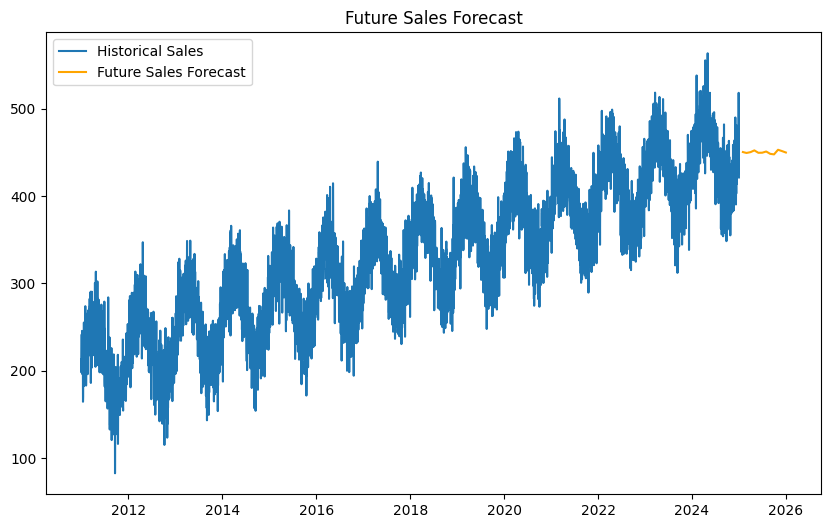

In [17]:
# Plot the future sales forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Sales'], label='Historical Sales')
plt.plot(forecast_future_index, forecast_future_values, label='Future Sales Forecast', color='orange')
plt.title('Future Sales Forecast')
plt.legend()
plt.show()